In [1]:

import sys
import time
import pandas as pd
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\dna.csv')
import forgi.visual.mplotlib as fvm
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from MGfold import mgfold, mg_dot_bracket
from seqfold2_0 import fold_2
from seqfold import fold, dot_bracket




# Figure 3: code to obtain figure 3 of the paper.

In [2]:
#Sequence
seq= 'GGGACGACGGGGCACATTGTGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCCGCCTAGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCC'

# dot brachets strucuture computed by mfold in the unafold softwer. We consider this structure to be the ground truth
open_mfold =   [71, 72 , 0, 1, 2, 3, 4, 5, 6, 7, 33, 34, 35, 11, 12, 13, 14]
closed_mfold = [77, 76, 51, 50, 49, 48, 47, 46, 45, 44, 41, 40, 39, 21, 20, 19, 18]
db_mfold = ['.']*len(seq)


# Set '(' at the open_mfold indices
for i in open_mfold:
    db_mfold[i] = '('

# Set ')' at the closed_mfold indices
for i in closed_mfold:
    db_mfold[i] = ')'

# Convert the list back to a string
db_mfold = ''.join(db_mfold)

mfold/unafold


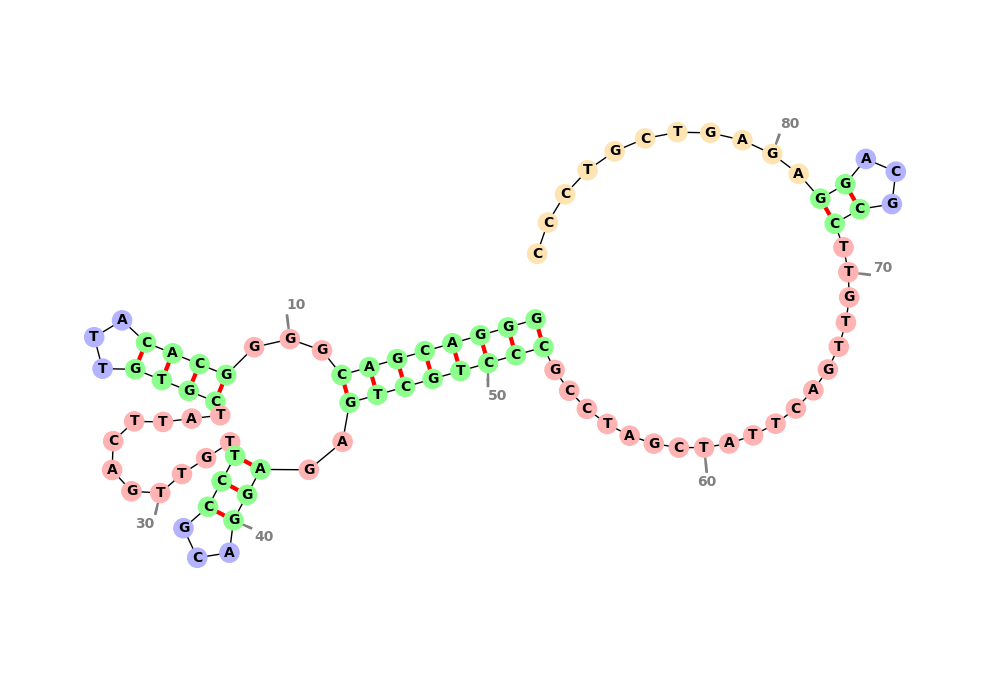

MGfold


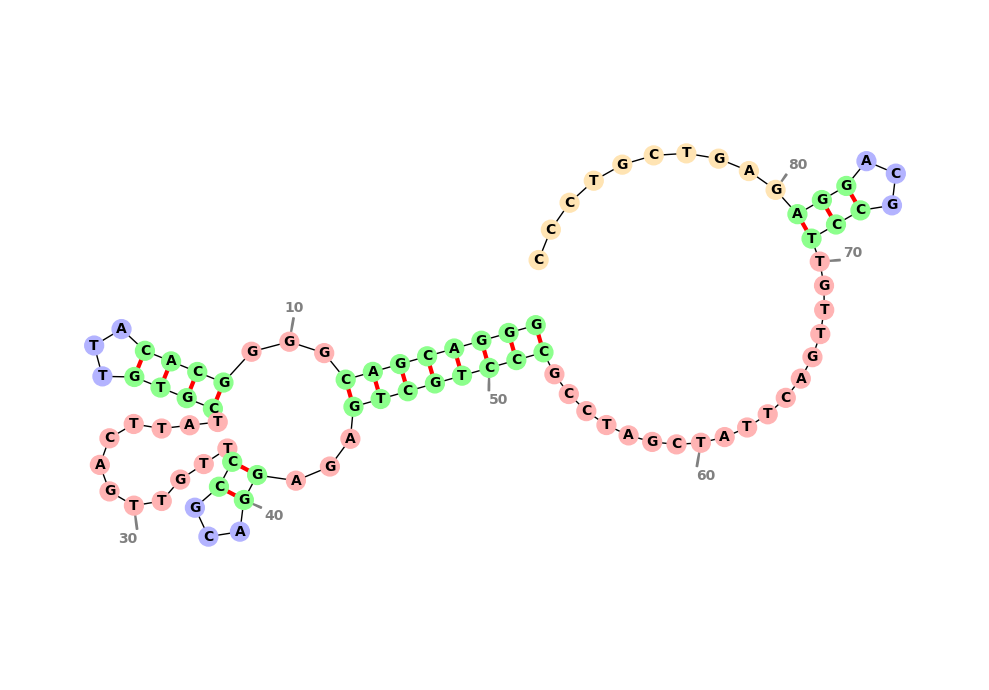

Seqfold2.0


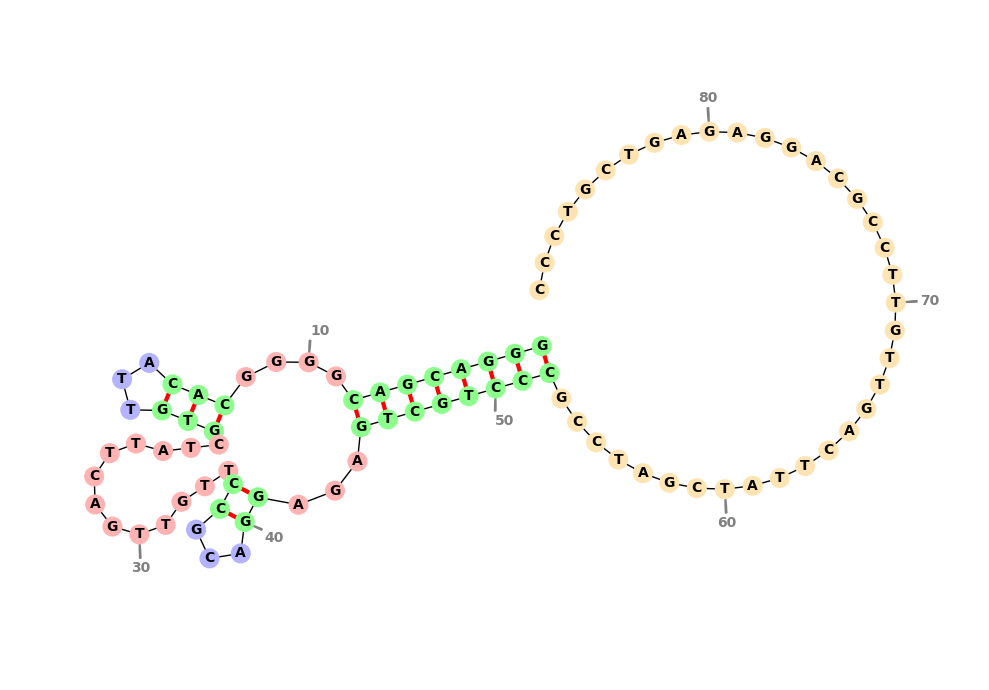

Seqfold


c:\Users\clima\anaconda3b\envs\aptamers_fold\Lib\site-packages\forgi\visual\mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


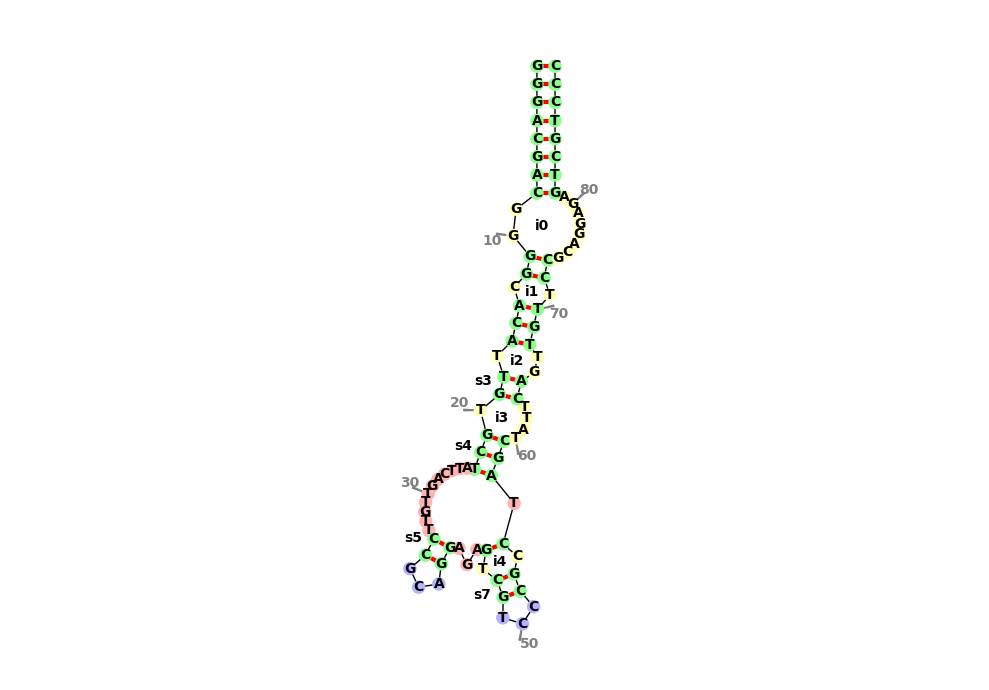

In [3]:

def plot_structure(seq, struct= None, d_b = None):
    if struct != None:
        d_b = mg_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    fig, ax = plt.subplots(figsize=(10, 7))
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})
    plt.tight_layout()
    plt.show()
    return

structs = mgfold(seq) # Run MGfold
structs1 = fold_2(seq) # Run Seqfold2.0
structs2 = fold(seq) #Run Sefold

print('mfold/unafold')
plot_structure(seq,d_b =  db_mfold)
print('MGfold')
plot_structure(seq, structs)
print('Seqfold2.0')
plot_structure(seq, structs1)
print('Seqfold')
plot_structure(seq, structs2)





# Comparison on sequences provided in the Seqfold github repository
To compute the mfold/unafold ground truth energy associated to the folded structures below, refer to the folding_constraint.txt file.  In the file wee provide the constraints necessary to impose UNAfold computing the  energy associated with the structure obtained with one of the analyzed methods

S1
GGGAGGTCGTTACATCTGGGTAACACCGGTACTGATCCGGTGACCTCCC
time MGfold 0.10031533241271973
time Seqfold 2.0 0.08192610740661621
time Seqfold 0.09960508346557617


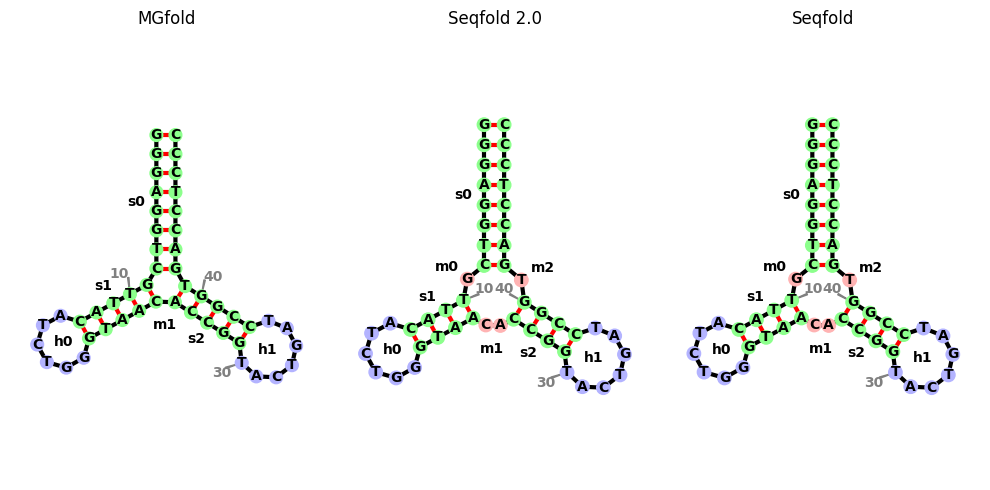

S2
GGGAGGTCGCTCCAGCTGGGAGGAGCGTTGGGGGTATATACCCCCAACACCGGTACTGATCCGGTGACCTCCC
time MGfold 1.8449795246124268
time Seqfold 2.0 0.3513309955596924
time Seqfold 0.42867136001586914


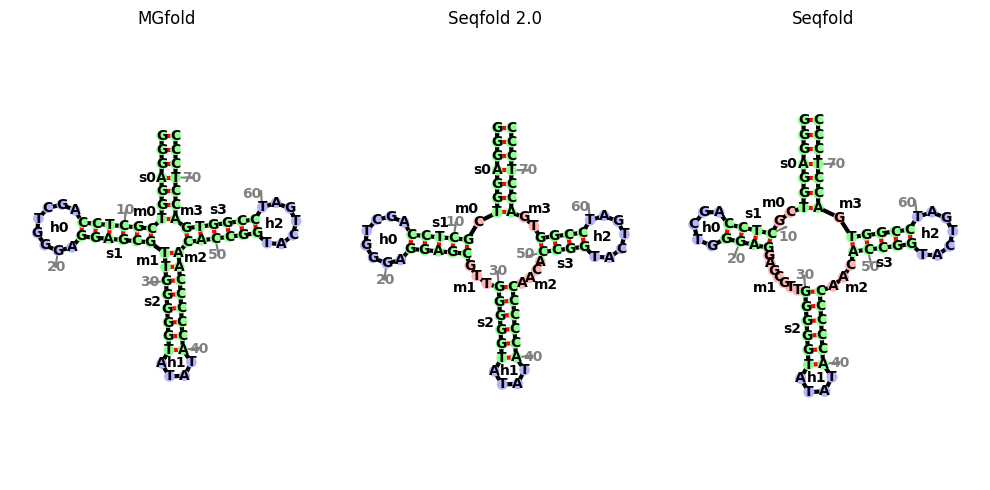

S3
TAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGT
time MGfold 0.01621866226196289
time Seqfold 2.0 0.04637408256530762
time Seqfold 0.03063225746154785


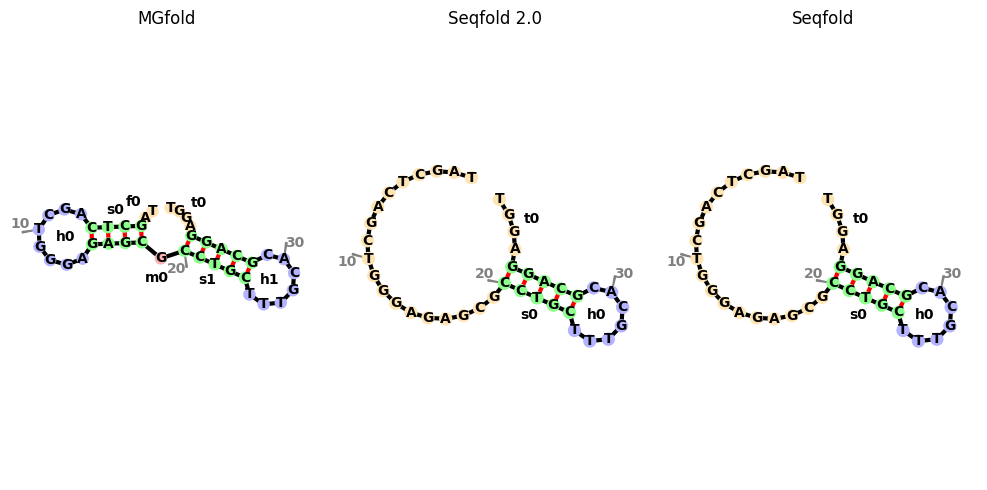

S4
GGGGGCATAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGTCTGCGGTTCGATCCCGCGCGCTCCCACCA
time MGfold 2.713759183883667
time Seqfold 2.0 0.38193511962890625
time Seqfold 0.6225085258483887


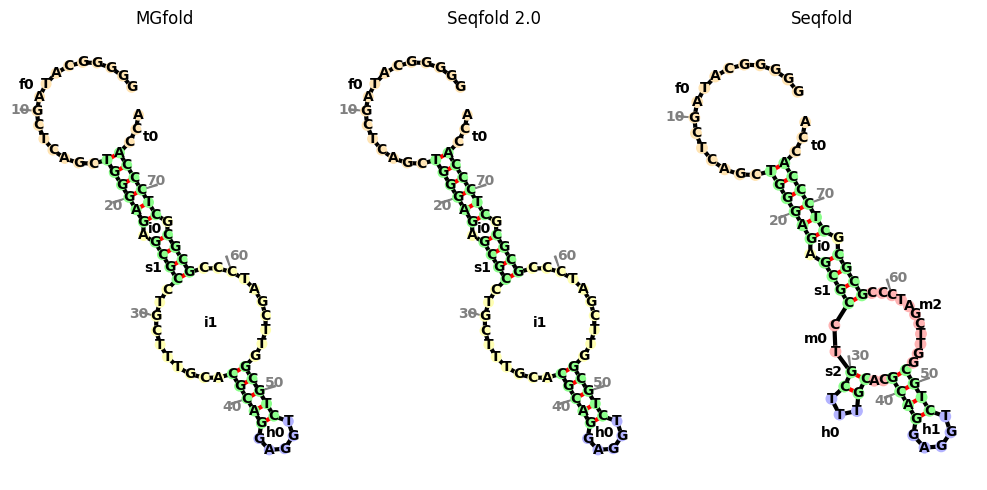

TGAGACGGAAGGGGATGATTGTCCCCTTCCGTCTCA
time MGfold 0.015769481658935547
time Seqfold 2.0 0.06996607780456543
time Seqfold 0.03475546836853027


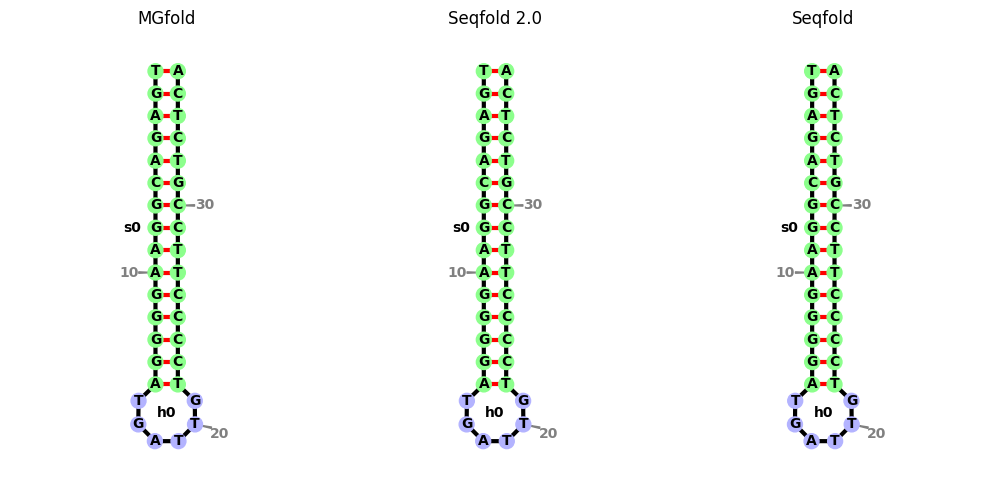

ACCCCCTCCTTCCTTGGATCAAGGGGCTCAA
time MGfold 0.01460123062133789
time Seqfold 2.0 0.03114938735961914
time Seqfold 0.018417835235595703


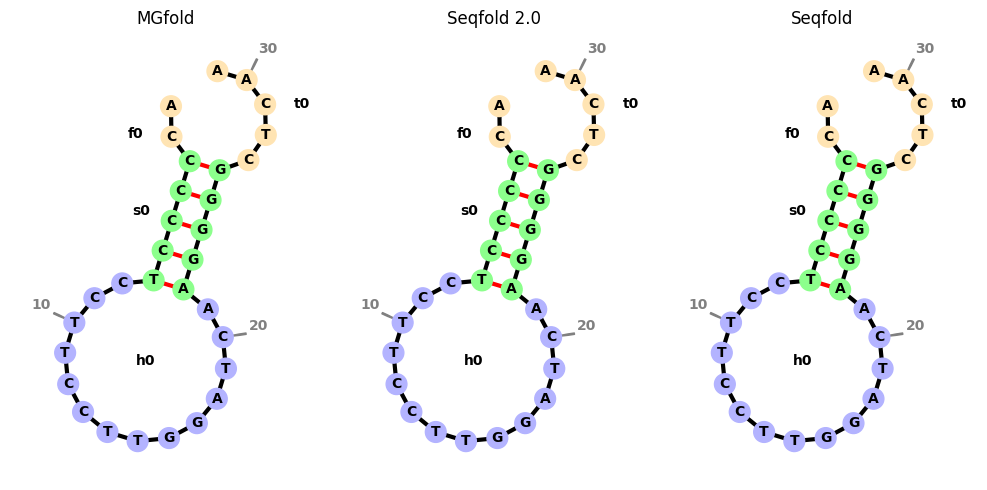

S5
TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC
time MGfold 0.8169035911560059
time Seqfold 2.0 0.9348161220550537
time Seqfold 1.3277947902679443


c:\Users\clima\anaconda3b\envs\aptamers_fold\Lib\site-packages\forgi\visual\mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


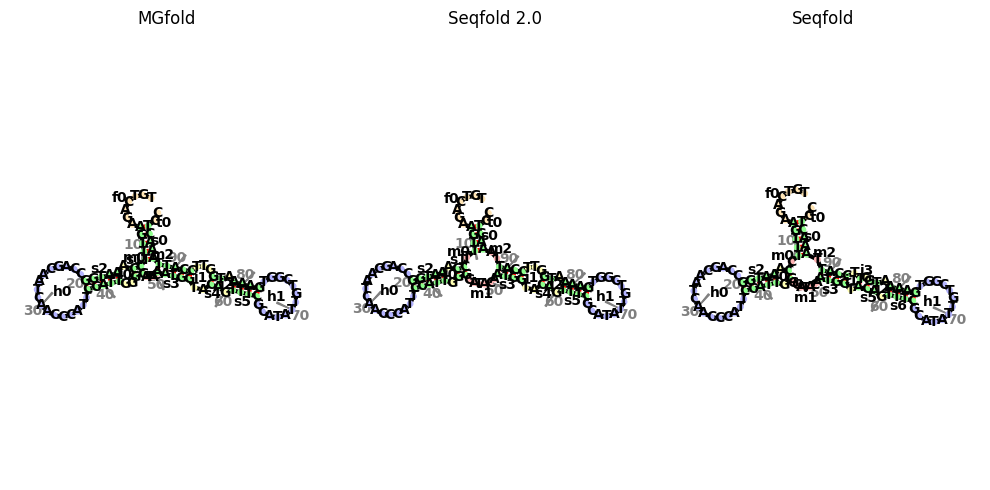

In [4]:
# Compare  MGfold, Seqfold 2.0 and Seqfold on sequences provided in Seqfold github reposoitory. 
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\dna.csv')


sequences_in_table = {0: 'S1', 1: 'S2', 3: 'S3', 4: 'S4', 7: 'S5'}

for count, seq in enumerate(df['seq']):
   
    if 'U' not in seq:
        if count in sequences_in_table:
            print(sequences_in_table[count])
        print(seq)
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
        start_time = time.time()
        structs = mgfold(seq, l_fix = 0, n_branches=4)
        print('time MGfold',time.time() - start_time  )
        d_b = mg_dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax1, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax1.set_title('MGfold')
        
        
        start_time = time.time()
        structs = fold_2(seq)
        print('time Seqfold 2.0',time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax2, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax2.set_title('Seqfold 2.0')
        
        start_time = time.time()
        structs = fold(seq)
        print('time Seqfold', time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,  ax= ax3, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax3.set_title('Seqfold')
        
        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()
    
